In [262]:
import pandas as pd
import numpy as np
from datetime import date

In [263]:
data = pd.read_csv("used_cars_data.csv", index_col= "S.No.")
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [264]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 793.3+ KB


In [265]:
print("#"*40,"\n","Missing values(%):","\n","#"*40,"\n",round(((data.isnull().sum())/(data.isnull().count())*100),2))

######################################## 
 Missing values(%): 
 ######################################## 
 Name                  0.00
Location              0.00
Year                  0.00
Kilometers_Driven     0.00
Fuel_Type             0.00
Transmission          0.00
Owner_Type            0.00
Mileage               0.03
Engine                0.63
Power                 0.63
Seats                 0.73
New_Price            86.13
Price                17.01
dtype: float64


### Observations
##### New Price have a huge gap, as 86% of the data is missing
##### Price have around 17% of the data is missing
##### Mileage, Engine, Power and Seats have around 0.03%,0.63%,0.63%,0.73% of the data is missing respectively

In [266]:
#Remove the units and storing in numerical format
data["Mileage"] = data["Mileage"].str.rstrip(" kmpl")
data["Mileage"] = data["Mileage"].str.rstrip(" km/g")
data["Engine"] = data["Engine"].str.rstrip(" CC")
data["Power"] =data["Power"].str.rstrip(" bhp")
data["Power"]= data["Power"].replace(regex="null", value = np.nan)

In [267]:
#parameters with 0 mileage need to be fixed
data.loc[data["Mileage"]=='0.0','Mileage']=np.nan
data.loc[data["Seats"]=='0','Seats'] =np.nan

In [268]:
data["New_Price"].unique()

array([nan, '8.61 Lakh', '21 Lakh', '10.65 Lakh', '32.01 Lakh',
       '47.87 Lakh', '10.57 Lakh', '12.33 Lakh', '11.12 Lakh',
       '23.64 Lakh', '18.64 Lakh', '19.34 Lakh', '49.14 Lakh',
       '11.81 Lakh', '16.65 Lakh', '6.67 Lakh', '6.45 Lakh', '6.41 Lakh',
       '27 Lakh', '5.13 Lakh', '54.43 Lakh', '9.51 Lakh', '9.96 Lakh',
       '14.44 Lakh', '4.53 Lakh', '95.04 Lakh', '13.49 Lakh', '1.28 Cr',
       '60.88 Lakh', '7.39 Lakh', '69.47 Lakh', '8.78 Lakh', '12.74 Lakh',
       '10.52 Lakh', '11.98 Lakh', '8.54 Lakh', '33.58 Lakh', '9.12 Lakh',
       '5.29 Lakh', '44.28 Lakh', '20.74 Lakh', '11.74 Lakh',
       '25.52 Lakh', '14.07 Lakh', '95.13 Lakh', '8.34 Lakh', '8.85 Lakh',
       '25.4 Lakh', '16.67 Lakh', '79.43 Lakh', '6.62 Lakh', '1.04 Cr',
       '58.67 Lakh', '28.37 Lakh', '4.48 Lakh', '72.64 Lakh',
       '36.15 Lakh', '44.59 Lakh', '12 Lakh', '14.65 Lakh', '53.72 Lakh',
       '33.91 Lakh', '12.51 Lakh', '9.74 Lakh', '95.38 Lakh',
       '60.59 Lakh', '11.28 Lakh', 

###### From the above observation we can see that we have values with lakh as wellas crore unit.

In [269]:
def new_price_conver(price):
    if "Lakh" in str(price):
        value = float(str(price).replace('Lakh', ''))
        value *= 100000
    elif "Cr" in str(price):
        value = float(str(price).replace('Cr', ''))
        value *= 10000000
    else:
        return np.nan
    return str(round(value,3))

data["New_Price"] = data["New_Price"].apply(new_price_conver)

In [270]:
data['Brand'] = data['Name'].str.split(' ').str[0] 
data['Model'] = data['Name'].str.split(' ').str[1] + data['Name'].str.split(' ').str[2]

In [271]:
data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model
S.No.,,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,NaN,1.75,Maruti,WagonR
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,NaN,12.50,Hyundai,Creta1.6
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,861000.0,4.50,Honda,JazzV
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,NaN,6.00,Maruti,ErtigaVDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,NaN,17.74,Audi,A4New
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598,103.6,5.0,NaN,NaN,Volkswagen,VentoDiesel
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197,103.6,5.0,NaN,NaN,Volkswagen,PoloGT
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461,63.1,5.0,NaN,NaN,Nissan,MicraDiesel


In [272]:
# dropping the row which dont have name
data = data.dropna(subset=['Name'])

In [273]:
print("#"*40,"\n""The number of cars wrt the brand")
print("#"*40,"\n")
print(data.loc[:, 'Brand'].value_counts())
print("#"*40,"\n""The number of cars wrt the Model")
print("#"*40,"\n")
print(data.loc[:, 'Model'].value_counts())
print("#"*40,"\n")

######################################## 
The number of cars wrt the brand
######################################## 

Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               312
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land               67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini               31
Volvo              28
Porsche            19
Jeep               19
Datsun             17
ISUZU               3
Force               3
Isuzu               2
Bentley             2
Smart               1
Ambassador          1
Lamborghini         1
Hindustan           1
OpelCorsa           1
Name: Brand, dtype: int64
######################################## 
The number of cars wrt the Model
######################################## 

SwiftDzire  

In [274]:
data.describe()

,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,2013.365366,5.869906e+04,5.279722,9.479468
std,3.254421,8.442772e+04,0.811660,11.187917
min,1996.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.341600e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [275]:
# Filling missing values in 'Engine', 'Power', and 'Mileage' columns
cols_to_fill = ['Engine', 'Power', 'Mileage']
for col in cols_to_fill:
    data[col] = data.groupby(['Brand', 'Model'])[col].apply(lambda x: x.fillna(x.median()))

# Filling missing values in 'Seats' column
data['Seats'] = data.groupby(['Name', 'Model'])['Seats'].apply(lambda x: x.fillna(x.median()))

# Filling missing values in 'new_price_num' column
fill_levels = [['Name', 'Year'], 'Name', ['Brand', 'Model'], 'Brand']
for level in fill_levels:
    data['New_Price'] = data.groupby(level)['New_Price'].apply(lambda x: x.fillna(x.median()))

# Dropping remaining rows with missing values (excluding 'new_price_num')
data.dropna(subset=['Engine', 'Power', 'Mileage', 'Seats'], inplace=True)

# Filling any remaining missing values
cols_to_fill_remaining = ['Power', 'Mileage', 'Engine']
for col in cols_to_fill_remaining:
    data[col] = data[col].fillna(data[col].median())

# Additional steps
data["Location"] = data["Location"].astype("category")
data['Brand'] = data['Brand'].astype("category")

# Displaying the final information
print(data.isnull().sum())


C:\Users\User\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\User\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\User\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\User\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\User\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\User\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price             159
Price                1216
Brand                   0
Model                   0
dtype: int64


In [276]:
data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price             159
Price                1216
Brand                   0
Model                   0
dtype: int64

In [277]:
data.dropna(inplace=True,axis=0)

In [278]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5818 entries, 0 to 6017
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               5818 non-null   object  
 1   Location           5818 non-null   category
 2   Year               5818 non-null   int64   
 3   Kilometers_Driven  5818 non-null   int64   
 4   Fuel_Type          5818 non-null   object  
 5   Transmission       5818 non-null   object  
 6   Owner_Type         5818 non-null   object  
 7   Mileage            5818 non-null   object  
 8   Engine             5818 non-null   object  
 9   Power              5818 non-null   object  
 10  Seats              5818 non-null   float64 
 11  New_Price          5818 non-null   object  
 12  Price              5818 non-null   float64 
 13  Brand              5818 non-null   category
 14  Model              5818 non-null   object  
dtypes: category(2), float64(2), int64(2), object(9)
memory 

#### Feature Engineering

In [279]:
data["Car_Age"] = date.today().year - data["Year"]

In [280]:
# Convert columns to appropriate types
data['Location'] = data['Location'].astype('category')
data['Fuel_Type'] = data['Fuel_Type'].astype('category')
data['Transmission'] = data['Transmission'].astype('category')
data['Owner_Type'] = data['Owner_Type'].astype('category')
data['Brand'] = data['Brand'].astype('category')
data['Model'] = data['Model'].astype('category')
data['New_Price'] = data['New_Price'].astype('float64')
data['Mileage'] = data['Mileage'].astype('float64')
data['Engine'] = data['Engine'].astype('int64')
data['Power'] = data['Power'].astype('float64')


In [281]:
import matplotlib.pyplot as plt 
import seaborn as sns

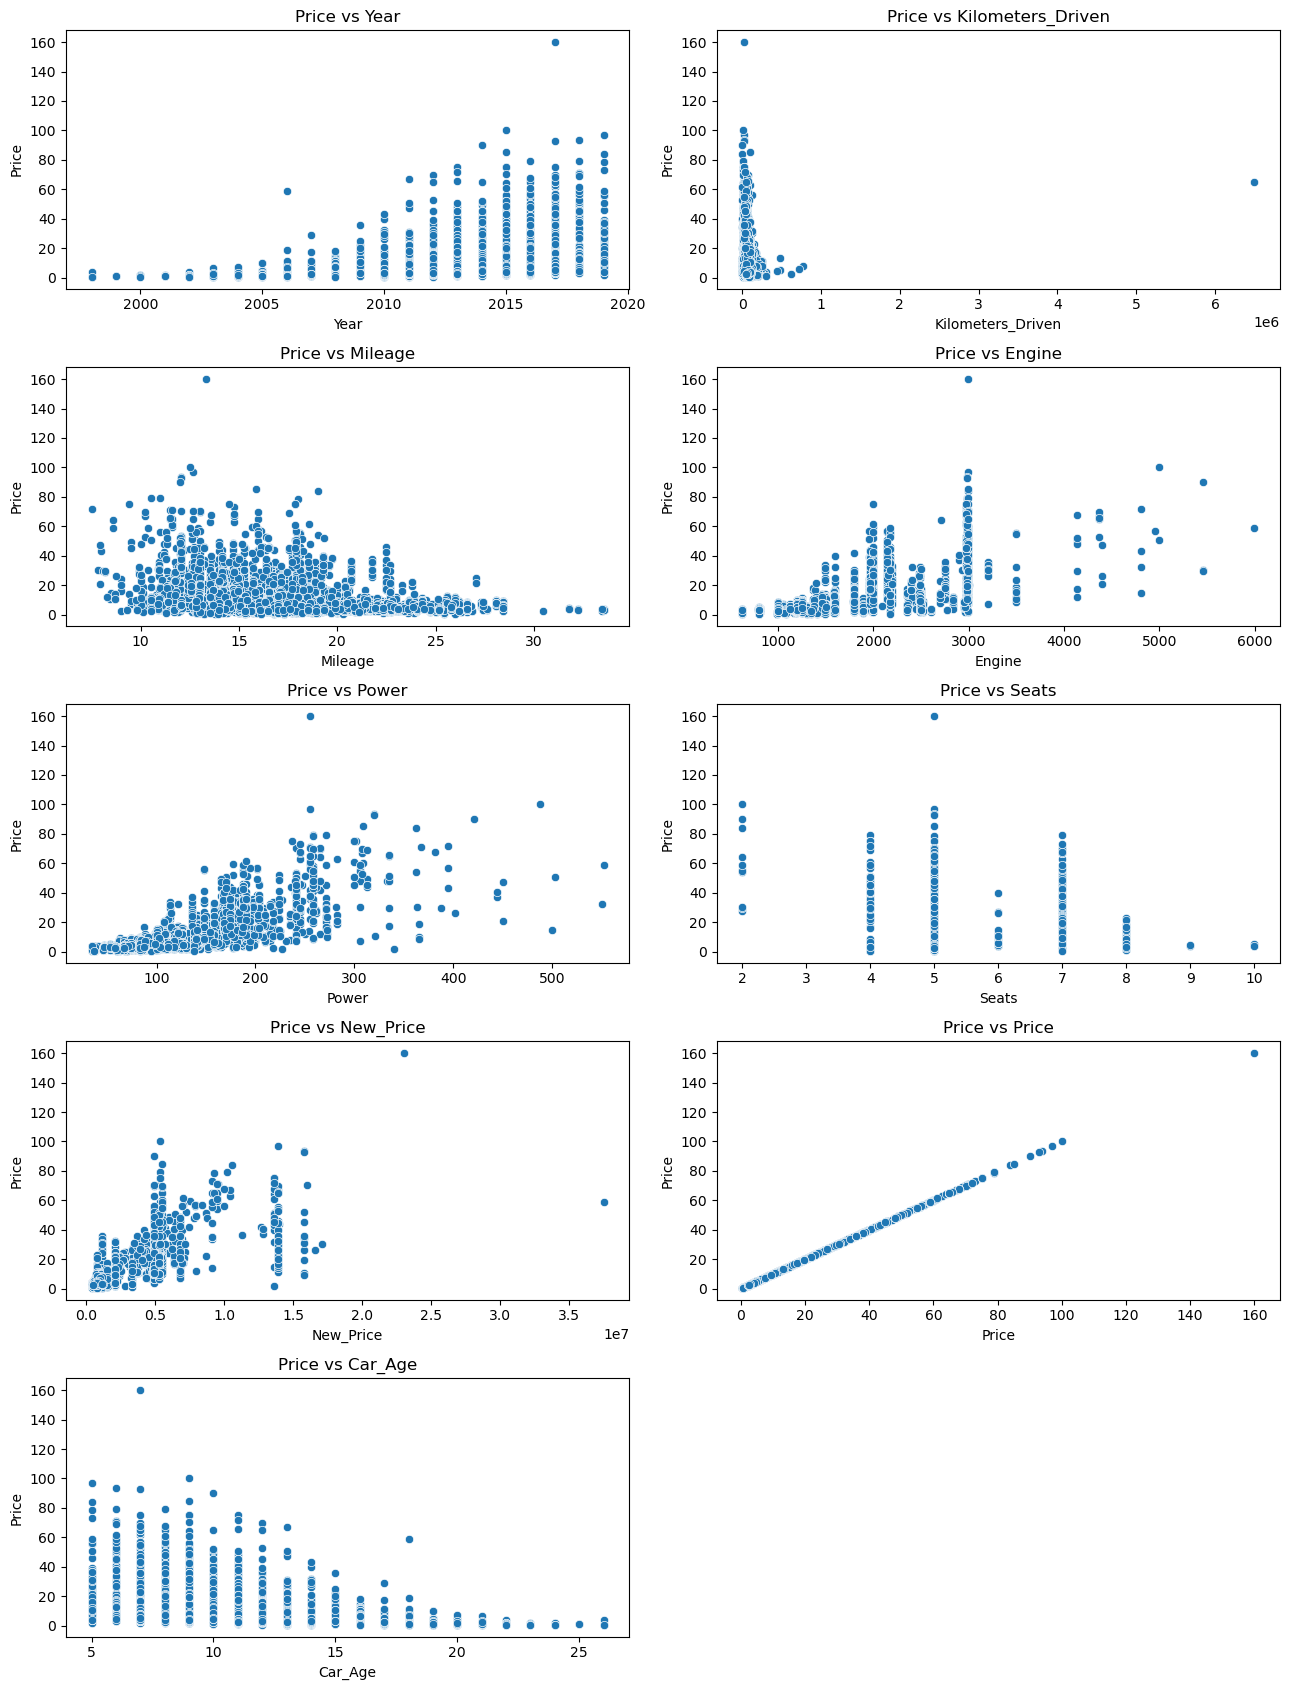

In [282]:
numeric_columns= data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(13,17))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,2,i+1)
                     sns.scatterplot(x=data[variable],y=data['Price']).set(title='Price vs '+ variable)
                     #plt.xticks(rotation=90)
                     plt.tight_layout()
                     

In [254]:
data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age
count,5818.000000,5.818000e+03,5818.000000,5818.000000,5818.000000,5818.000000,5.818000e+03,5818.000000,5818.000000
mean,2013.451873,5.851326e+04,18.348505,1624.432451,113.014905,5.280853,1.900809e+06,9.615718,10.548127
std,3.209788,9.258552e+04,4.177422,599.283620,53.628231,0.796145,2.252849e+06,11.177731,3.209788
min,1998.000000,1.710000e+02,7.500000,624.000000,34.200000,2.000000,3.910000e+05,0.440000,5.000000
25%,2012.000000,3.355050e+04,15.300000,1198.000000,74.000000,5.000000,8.070000e+05,3.550000,8.000000
50%,2014.000000,5.282850e+04,18.200000,1495.000000,94.000000,5.000000,9.847500e+05,5.750000,10.000000
75%,2016.000000,7.248175e+04,21.100000,1984.000000,138.100000,5.000000,1.606000e+06,10.110000,12.000000
max,2019.000000,6.500000e+06,33.540000,5998.000000,552.000000,10.000000,3.750000e+07,160.000000,26.000000


In [283]:
data.drop(['Name','Model','Year','Brand'],axis=1,inplace=True)

In [284]:
def encode_cat_vars(x):
    x = pd.get_dummies(
        x,
        columns=x.select_dtypes(include=["category"]).columns.tolist(),
        drop_first=True,
    )
    return x

# Assuming X is a DataFrame
data = encode_cat_vars(data)
data.head()

'def encode_cat_vars(x):\n    x = pd.get_dummies(\n        x,\n        columns=x.select_dtypes(include=["category"]).columns.tolist(),\n        drop_first=True,\n    )\n    return x\nX = encode_cat_vars(X)\nX.head()\n'

In [285]:
X = data.drop(["Price"], axis=1)
y = data[["Price"]]

In [286]:
from sklearn.model_selection import train_test_split

In [287]:
X_train, X_test , y_train, y_test = train_test_split(X , y , train_size = 0.80 , test_size = 0.20)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4654, 24), (1164, 24), (4654, 1), (1164, 1))

In [288]:
data.head()

,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Location_Bangalore,Location_Chennai,...,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
S.No.,,,,,,,,,,,,,,,,,,,,,
0,72000,26.60,998,58.16,5.0,529000.0,1.75,14,0,0,...,0,1,0,0,0,0,1,0,0,0
1,41000,19.67,1582,126.20,5.0,1606000.0,12.50,9,0,0,...,0,0,1,1,0,0,1,0,0,0
2,46000,18.20,1199,88.70,5.0,861000.0,4.50,13,0,1,...,0,0,0,0,0,1,1,0,0,0
3,87000,20.77,1248,88.76,7.0,1127000.0,6.00,12,0,1,...,0,0,0,1,0,0,1,0,0,0
4,40670,15.20,1968,140.80,5.0,5314000.0,17.74,11,0,0,...,0,0,0,1,0,0,0,0,1,0


In [289]:
np.array(X_train)

array([[8.93270e+04, 1.78000e+01, 1.39900e+03, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [4.20360e+04, 1.37000e+01, 1.79800e+03, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [6.17000e+04, 1.48000e+01, 1.79900e+03, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [7.60000e+04, 1.30000e+01, 2.98200e+03, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       [1.79032e+05, 1.15600e+01, 3.20000e+03, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [6.00000e+04, 2.35900e+01, 1.36400e+03, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00]])

In [290]:
import numpy as np

def normal_equation(X, y):
    return np.linalg.inv(X.T @ X) @ (X.T @ y)

# Assuming X is your feature matrix and y is the target variable
# Add a column of ones to X for the bias term
X = np.c_[np.ones((len(X), 1)), X]

# Call the normal equation function
theta = normal_equation(np.array(X_train), np.array(y_train))

print("Theta:", theta)


Theta: [[ 2.15074201e-06]
 [ 4.96952231e-02]
 [ 1.33393829e-03]
 [ 7.45180290e-02]
 [ 4.36629784e-01]
 [ 2.01086849e-06]
 [-9.18470503e-01]
 [ 2.71075826e+00]
 [ 1.03854512e+00]
 [ 2.48403466e+00]
 [-9.13543793e-03]
 [ 1.84022119e+00]
 [ 1.34660567e+00]
 [ 5.94223809e-01]
 [-5.01429693e-01]
 [-1.05073788e-01]
 [ 7.17813931e-01]
 [ 1.75898371e+00]
 [ 4.46699221e+00]
 [ 1.47182330e+00]
 [-1.27682269e+00]
 [-4.32252791e-02]
 [-7.46237921e-01]
 [-4.02503400e-01]]


In [291]:
# Assuming you have already trained your model and obtained the parameter theta

# Add a column of ones to X_test for the bias term
X_test_with_bias = np.c_[np.ones((len(X_test), 1)), X_test]

# Make predictions using the trained model
y_pred = np.dot(X_test_with_bias, theta)

# Calculate Mean Squared Error (MSE)
mse = np.mean((y_pred - y_test) ** 2)

print("Mean Squared Error (MSE):", mse)


ValueError: shapes (1164,25) and (24,1) not aligned: 25 (dim 1) != 24 (dim 0)